The technique of image restoration involves recovering an image from a damaged state—typically a distorted and noisy image. In image processing, image restoration is a core issue.
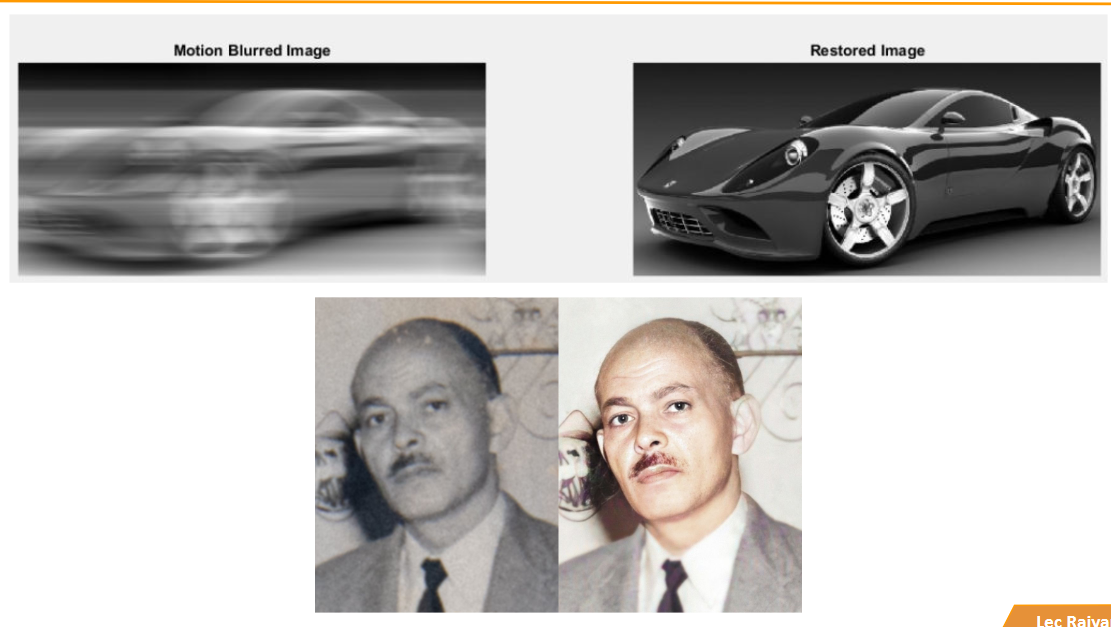

### Types of Image Degradation:
1. Noise: Noise can be introduced during image acquisition or transmission, resulting in random variations in pixel values. Common types of noise include Gaussian noise, salt-and-pepper noise, and speckle noise.
2. Blur: Blur occurs when the image is not sharply focused, resulting in a loss of detail and sharpness. Blur can be caused by factors such as motion blur, defocus blur, or optical aberrations.

### Image Restoration Techniques:
1. Filtering: Filtering techniques are commonly used for image restoration. Different filters can be applied depending on the type of degradation present in the image.
2. Noise Reduction: Techniques such as median filtering, Gaussian filtering, or bilateral filtering can be used to reduce noise while preserving image details.
3. Deblurring: Deblurring techniques aim to recover the sharpness and detail lost due to blur. This can be achieved using methods like Wiener filtering, blind deconvolution, or inverse filtering.

### Model-based Approaches
Model-based approaches assume a mathematical model of the degradation
process and aim to estimate the parameters of this model to recover the
original image. For example:
1. Restoration Using PSF Estimation: In cases of blur, estimating the point spread function (PSF) of the blur is crucial. Once the PSF is estimated, techniques like Richardson-Lucy deconvolution or maximum likelihood estimation can be used to restore the image.
2. Sparse Representation-based Restoration: This approach assumes that the image can be represented as a sparse linear combination of basis functions. By promoting sparsity, the original image can be recovered from noisy or blurred observations.

### Deep Learning-based Approaches
Deep learning techniques, particularly convolutional neural networks (CNNs), have shown promising results in image restoration tasks. These methods learn complex mappings directly from input degraded images to their corresponding clean versions.
1. Image Denoising: CNN-based denoising models are trained to map noisy images to their noise-free counterparts.
2. Image Deblurring: CNNs can also be trained to learn the mapping between blurry images and their sharp counterparts.

### Evaluation and Quality Metrics
When evaluating image restoration algorithms, it's important to consider both objective and subjective quality metrics.  Objective metrics include measures like: 
1. peak signal-to-noise ratio (PSNR) and
2. structural similarity index (SSIM)

while subjective evaluation involves human observers rating the visual quality of the restored images.

### Fundamentals of Image Restoration
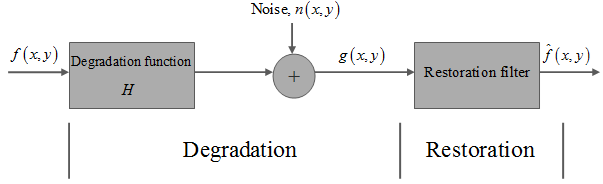

In spatial domain, the degradation of the original image can be modeled as:

#### g(x,y)=h(x,y)∗f(x,y)+n(x,y) ...... (1)g(x,y)=h(x,y)∗f(x,y)+n(x,y) ...... (1)

Where,

##### (x,y)(x,y)= detached pixel coordinates of the image frame.

##### f(x,y)f(x,y)= Original image

##### g(x,y)g(x,y)= Degraded image

##### h(x,y)h(x,y)= Image degradation function

##### n(x,y)n(x,y)= Ad-on noise

As convolution operation within the spatial domain corresponds to multiplication in the frequency domain, equation 1 can be rewritten as:

##### G(u,v)=H(u,v)×F(u,v)+N(u,v) ...... (2)G(u,v)=H(u,v)×F(u,v)+N(u,v) ...... (2)

Now, Motion blur is present when there exists comparative motion in the midst of the recording device and the scene (object). However, the types of blur may be in the appearance of a translation, rotation, and scaling, or some combinations of these. Here only the critical case of a global translation will be considered.

Let’s pretend the scene to be recorded interprets comparative to the camera at constant velocities a and b along with the directions of x and y during the exposure time T. The frequency-domain degradation function can be simplified as:

##### H(u,v)=sin⁡(π(ua+vb)T)π(ua+vb)e−jπ(ua+vb)T ...... (3)H(u,v)=π(ua+vb)sin(π(ua+vb)T)​e−jπ(ua+vb)T ...... (3)

Image restoration process can be subdivided into two classes:
1. Deterministic methods are applicable to images with a small amount of noise and a familiar degradation function.
2. Stochastic techniques are to restore images according to some stochastic criterion.

### Let's see the code

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def noise(img,snr):
    h=img.shape[0]
    w=img.shape[1]
    img1=img.copy()
    sp=h*w
    NP=int(sp*(1-snr))
    for i in range (NP):
        randx=np.random.randint(1,h-1)
        randy=np.random.randint(1,w-1)
        if np.random.random()<=0.5:
            img1[randx,randy]=0
        else:
            img1[randx,randy]=255
    return img1

In [3]:
img = cv2.imread("Images/cameraman.png",1)
img_noise = noise(img, 0.6)

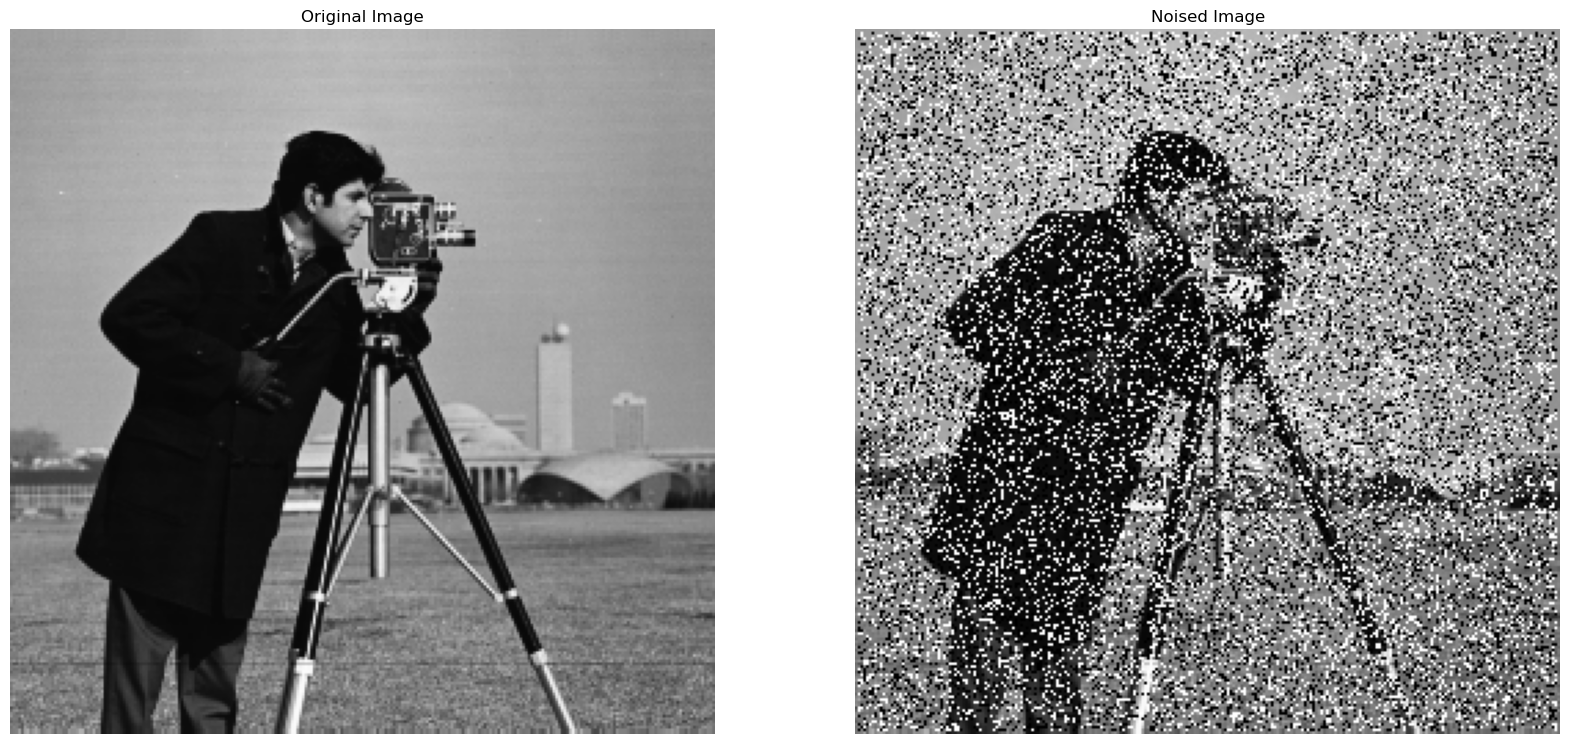

In [6]:
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_noise, cmap="gray")
plt.title("Noised Image")
plt.axis('off')

plt.show()

In [7]:
median = cv2.medianBlur(img_noise, 5)

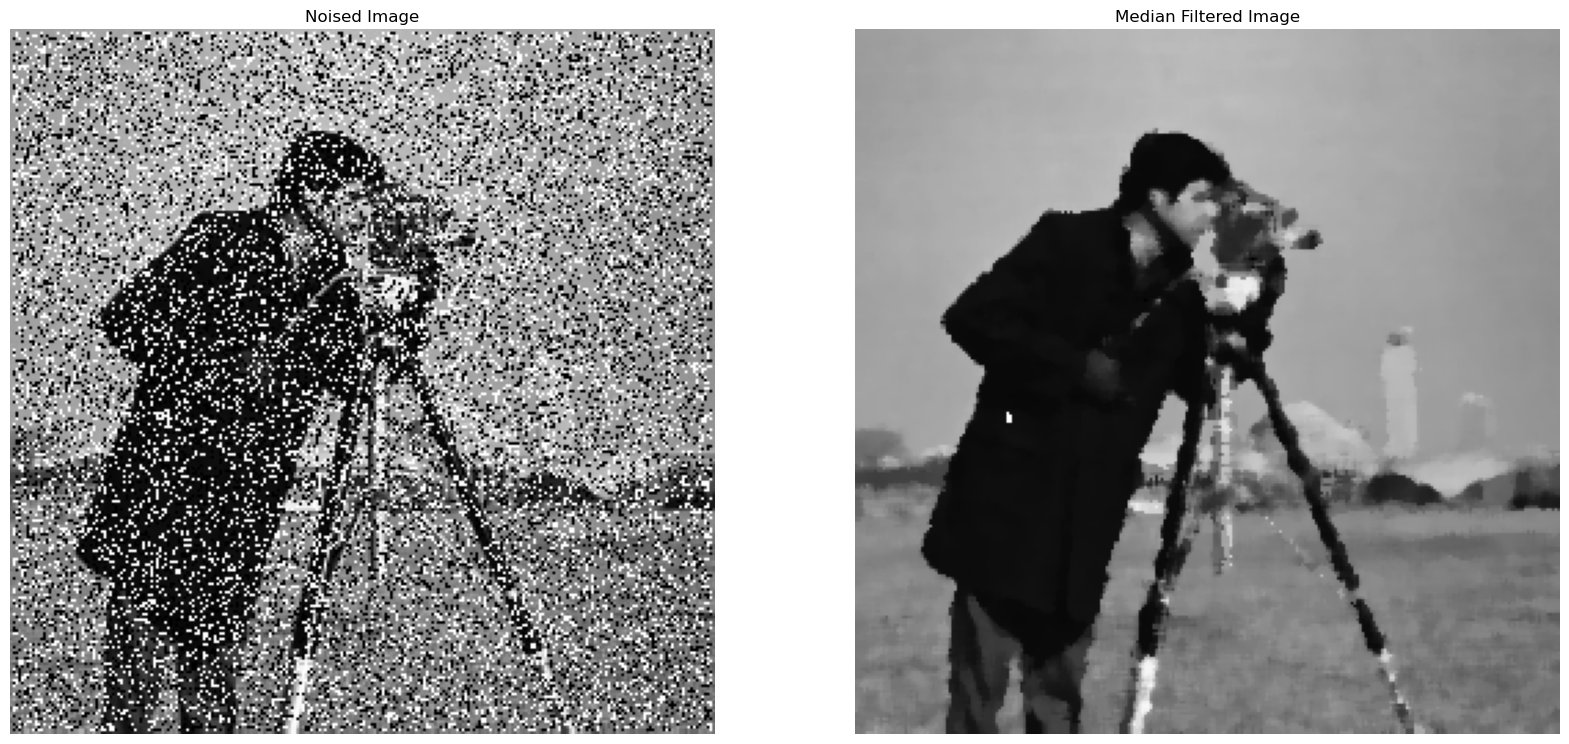

In [8]:
plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(img_noise, cmap="gray")
plt.title("Noised Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(median, cmap="gray")
plt.title("Median Filtered Image")
plt.axis('off')

plt.show()

In [9]:
img_gauss = cv2.GaussianBlur(img_noise, (5,5),0)

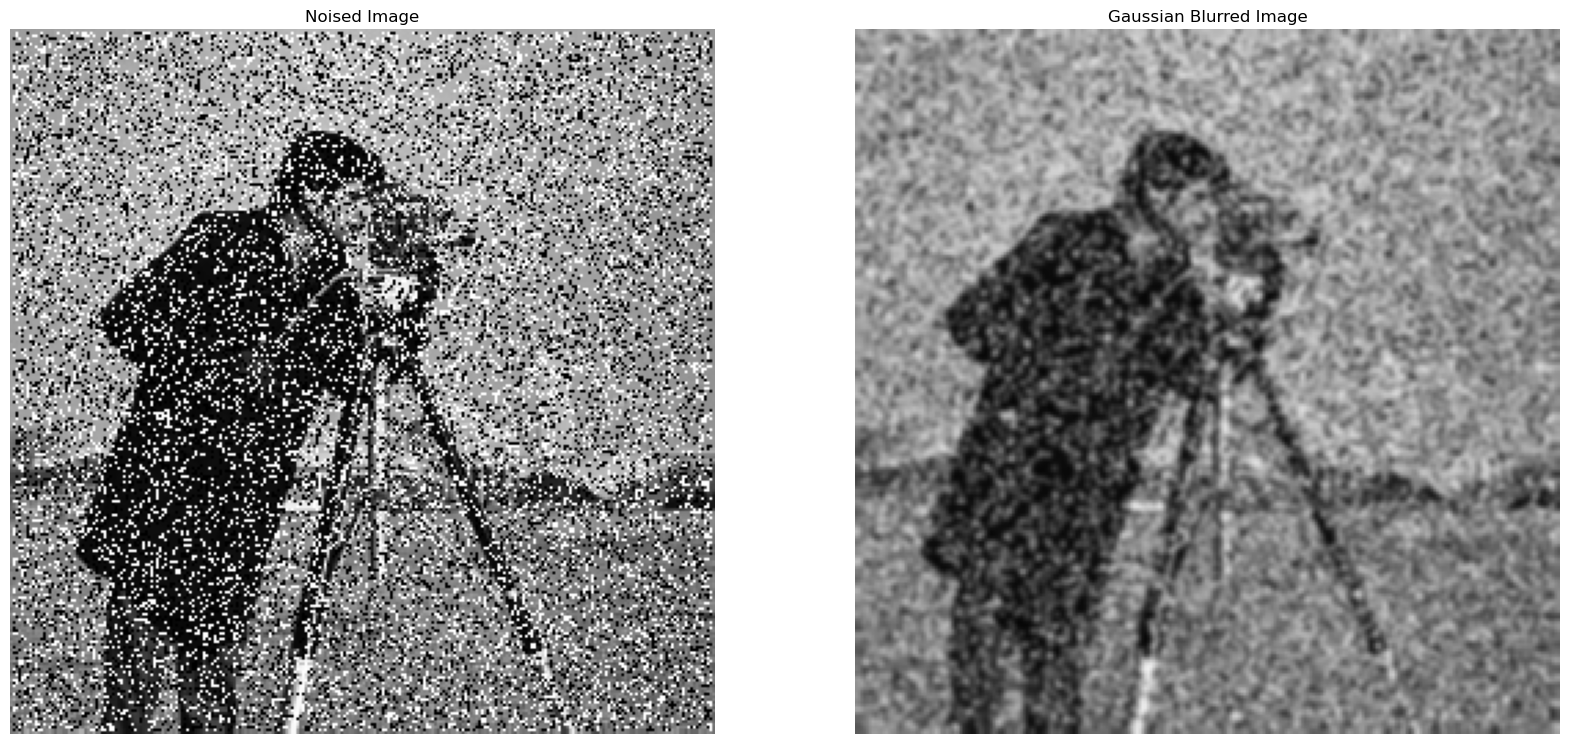

In [10]:
plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(img_noise, cmap="gray")
plt.title("Noised Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_gauss, cmap="gray")
plt.title("Gaussian Blurred Image")
plt.axis('off')

plt.show()

### References
1. https://open-instruction.com/image-processing/image-restoration/
https://www.kaggle.com/code/nashehannafii/dip-5-practicum-module-image-restoration/notebook